In [3]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler ,SMOTENC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
sent1 = "I love dogs"
sent2 = "I don't like dogs"
sent3 = "I adore cats"
sent4 = "I hate spiders"
sent5 = "I like dogs"
X = pd.Series([sent1, sent2, sent3, sent4, sent5])
y = pd.Series([1,0,1,0,1])
#tv = TfidfVectorizer(stop_words=None, max_features=100000)
#X = tv.fit_transform(X)
#pd.DataFrame(X.todense(), columns=tv.get_feature_names())
#print(X.shape)





In [7]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())

,adore,cats,dogs,don,hate,like,love,spiders
0,0.000000,0.000000,0.556451,0.000000,0.000000,0.000000,0.830881,0.000000
1,0.000000,0.000000,0.462208,0.690159,0.000000,0.556816,0.000000,0.000000
2,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
4,0.000000,0.000000,0.638711,0.000000,0.000000,0.769447,0.000000,0.000000
5,0.000000,0.000000,0.298794,0.446153,0.249998,0.359954,0.000000,0.249998


In [8]:
pd.DataFrame(X_SMOTE.todense()[y_SMOTE == 0], columns=tv.get_feature_names())

,adore,cats,dogs,don,hate,like,love,spiders
0,0.0,0.0,0.462208,0.690159,0.000000,0.556816,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.707107,0.000000,0.0,0.707107
2,0.0,0.0,0.298794,0.446153,0.249998,0.359954,0.0,0.249998


In [12]:
smt_nc = SMOTENC(categorical_features=(testing_tfidf.shape))
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())

,adore,cats,dogs,don,hate,like,love,spiders
0,0.000000,0.000000,0.556451,0.000000,0.000000,0.000000,0.830881,0.000000
1,0.000000,0.000000,0.462208,0.690159,0.000000,0.556816,0.000000,0.000000
2,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
4,0.000000,0.000000,0.638711,0.000000,0.000000,0.769447,0.000000,0.000000
5,0.000000,0.000000,0.298794,0.446153,0.249998,0.359954,0.000000,0.249998


Accuracy: 0.0, Time duration: 0.016000986099243164
Changed dataset shape y_train Counter({1: 2, 0: 2})
Changed dataset shape y_test Counter({1: 1})


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


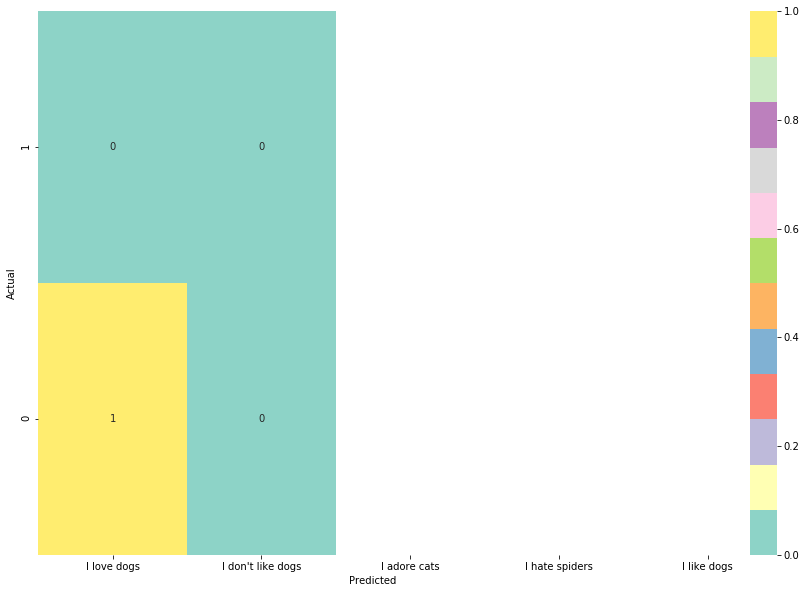

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

                   NaiveBayes
Accuracy                  0.0
Balanced accuracy         0.0


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
""" calling base line and balanced accuracy compariosn by making it in impbalance for better comparision"""

""" Making classification using pipline with only bag of words to check the under sampling effect"""

""" This fucntion basically cna be called from any pipline with hold out method, hence callling this for various sampling techniques"""

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from collections import Counter

def eve_clf(classifier, X, y , df_scores, clf_name=None):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()
    acc =classifier.score(X_test, y_test)

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    print('Changed dataset shape y_train %s' % Counter(y_train))
    print('Changed dataset shape y_test %s' % Counter(y_test))
    y_pred = classifier.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    #balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    
    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
    xticklabels=X.unique(), yticklabels=y.unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores

df_scores = pd.DataFrame()

#Calling with NB
trial1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', MultinomialNB())])


#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial1, X, y, df_scores,'NaiveBayes')
print(df_scores)

Accuracy: 0.0, Time duration: 0.31601810455322266
Changed dataset shape y_train Counter({1: 2, 0: 2})
Changed dataset shape y_test Counter({1: 1})


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


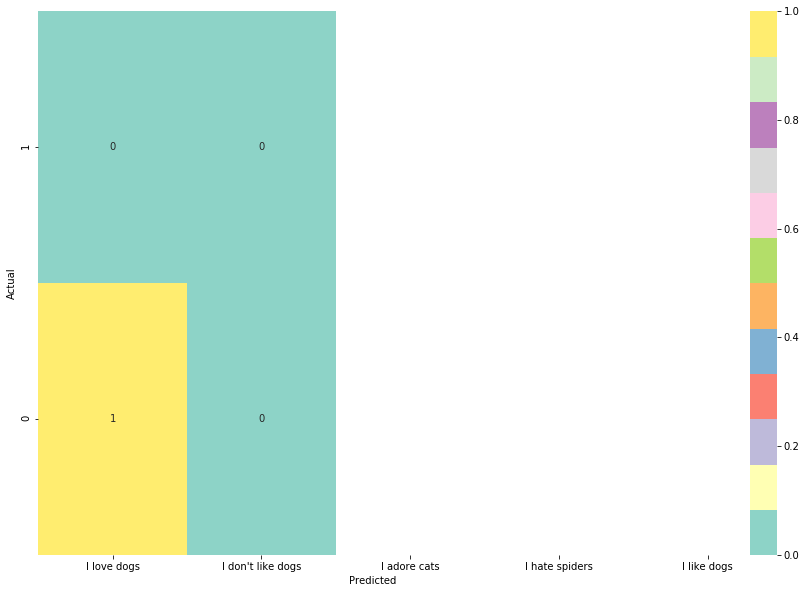

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

                   NaiveBayes   LR
Accuracy                  0.0  0.0
Balanced accuracy         0.0  0.0


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
"""Calling it with logistic regression"""

from sklearn.linear_model import LogisticRegression

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression())])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR')
print(df_scores)

Accuracy: 0.0, Time duration: 0.021001100540161133
Changed dataset shape y_train Counter({1: 2, 0: 2})
Changed dataset shape y_test Counter({1: 1})


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


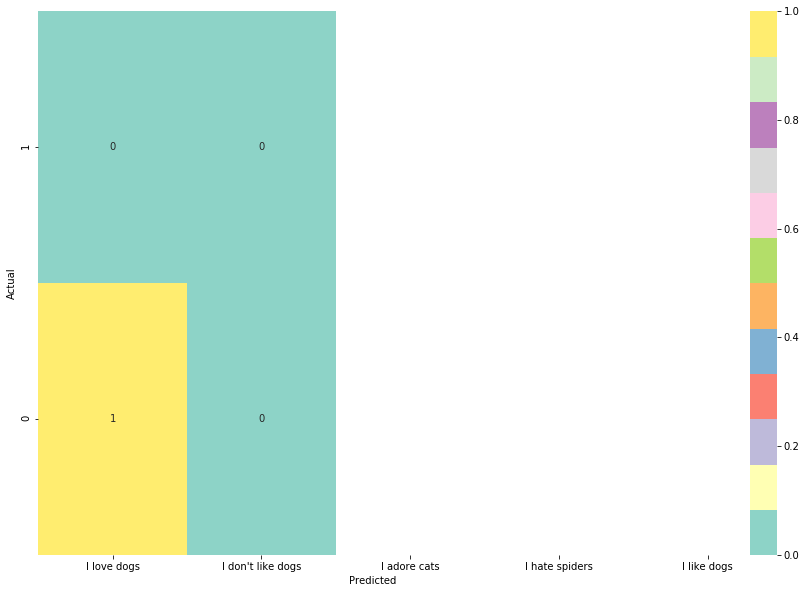

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

                   NaiveBayes   LR  LR with SMOTE-NC
Accuracy                  0.0  0.0               0.0
Balanced accuracy         0.0  0.0               0.0


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#Checking individual Oversampling techniques

""" Over sampling 1. Checking Regular SMOTE-NC"""

from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         SMOTENC(categorical_features=(X.shape)),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with SMOTE-NC')
print(df_scores)